## Week 7 Live Demo
Follow along in class to get plotting practice!

# NOAA's Extended Reconstructed Sea Surface Temperature (ERSST) 

Today we will plot monthly sea surface temperature anomaly (SSTA) maps from July 1945 and July 2024. SSTA measures the temperature anomalies with respect to average climatology from 1971— 2000. 

![ERSST Map](https://podaac.jpl.nasa.gov/sites/default/files/image/images/sst%20in%20ersst.v4.187112.jpg)

These temperature data are stored in two netCDF files in this folder.

# Loading the data
1. First, access the [dataset](https://www.ncei.noaa.gov/products/extended-reconstructed-sst) and locate the files we need.
2. Run starter code to grab URLs without downloading
- If the starter code cell below is taking way too long to run, go ahead and download the files you need from the dataset link and load them into your JupyterHub to access them! 
3. Display DataSets.

In [1]:
## Starter code: run this to get your data from the NCEI database
# import packages and necessary classes
import requests
from netCDF4 import Dataset
import xarray as xr

# helper function to grab data from NCEI and convert to xarray
def get_data(url):
    link = Dataset(url)
    return(xr.open_dataset(xr.backends.NetCDF4DataStore(link)))

# grab dataset from July 1945 and 2024
sst_1945=get_data('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.194507.nc#mode=bytes')
sst_2024=get_data('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.202407.nc#mode=bytes')

In [2]:
# display files
display(sst_1945)
display(sst_2024)

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) object 1945-07-01 00:00:00
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/38)
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.194507
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    ...                         ...
    platform:                   Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    instrument:                 Conventional thermometers
    source:                     In situ data: ICOADS R3.0 before 2015, NCEP i...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2017: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2024-07-15
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/70)
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   https://doi.org/10.7289/V5T72FNM
    dataset_doi:                     https://doi.org/10.7289/V5T72FNM
    id:                              gov.noaa.ncdc:C00927
    naming_authority:                gov.noaa.ncei
    title:                           NOAA ERSSTv5 (in situ only)
    ...                              ...
    references:                      Huang et al, 2017: Extended Reconstructe...
    climatology:                     Climatology is based on 1971-2000 SST, X...
    acknowledgment:                  The NOAA Extended Reconstructed Sea Surf...
    history:                         Sun Nov  3 13:15:27 2024: ncap2 -O -s ti...
    NCO:                             netCDF Operators version 4.7.5 (Homepage...
    nco_openmp_thread_number:        1

## For each DataSet:
1. What are the dimensions of the DataSet? 

2. Get the longitude and latitude values from the DataSet. 

3. Index the SSTA variables to get a 2-D arrays for plotting.

In [3]:
# what are the dimensions?
dimensions = sst_1945.dims
print(dimensions)

# to get lat and lon values
lat = sst_1945.lat.values
lon = sst_1945.lon.values

# create 2D ssta datasets
ssta_1945 = sst_1945["ssta"].isel(lev = 0, time = 0)

# dimensions of second dataset?
dimensions_2 = sst_2024.dims
print(dimensions_2)

# to get lat and lon values of second dataset
lat = sst_2024.lat.values
lon = sst_2024.lon.values

# create a second 2D ssta dataset for the second dataset
ssta_2024 = sst_2024["ssta"].isel(lev = 0, time = 0)

Frozen({'lat': 89, 'lev': 1, 'lon': 180, 'time': 1})
Frozen({'lat': 89, 'lev': 1, 'lon': 180, 'time': 1})


## Let's make basic global maps of SSTA.

1) Set PlateCarree projection.

2) Add coastlines.

3) Plot SST using pcolormesh.

4) Add a colorbar.

Text(0.5, 1.0, '2024 SSTA')

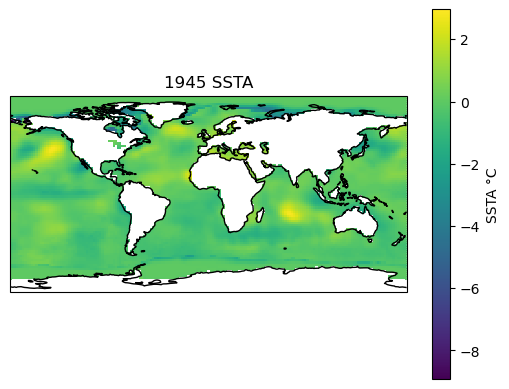

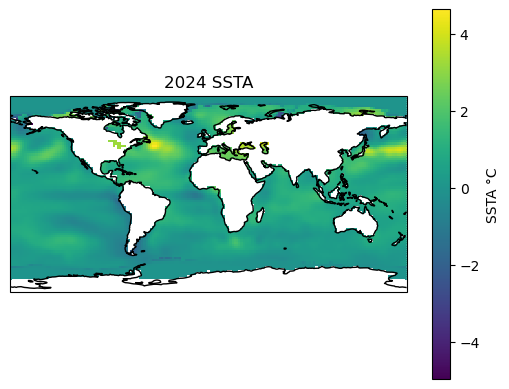

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# create initial figure with matplotlib
fig = plt.figure()
# add my cartopy features
ax = plt.axes(projection = ccrs.PlateCarree())
# add coastlines
ax.coastlines(resolution ='110m', color ='black')
# add ssta heat map
plt.pcolormesh(lon, lat, ssta_1945, transform = ccrs.PlateCarree())
# add colorbar
plt.colorbar(label = u'SSTA \N{DEGREE SIGN}C')
plt.title('1945 SSTA')

# create 2024 figure with matplotlib
fig = plt.figure()
# add my cartopy features
ax = plt.axes(projection = ccrs.PlateCarree())
# add coastlines
ax.coastlines(resolution ='110m', color ='black')
# add ssta heat map
plt.pcolormesh(lon, lat, ssta_2024, transform = ccrs.PlateCarree())
# add colorbar
plt.colorbar(label = u'SSTA \N{DEGREE SIGN}C')
plt.title('2024 SSTA')

## Discussion: How can we make these maps better?

- standardize color bar scales
- change map projection
- make color bar the same size as the map (improve aspect ratio)
- change color map to diverging palette

## Let's make *better* global maps of SSTA.
1) Set a better global projection.

2) Add land features.

3) Plot SST using pcolormesh. Set the same colormap limits for each map (named arguments *vmin* and *vmax*). Use a different colormap.

4) Bonus: Add latitude and longitude gridlines.

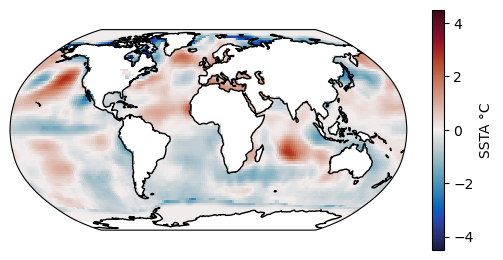

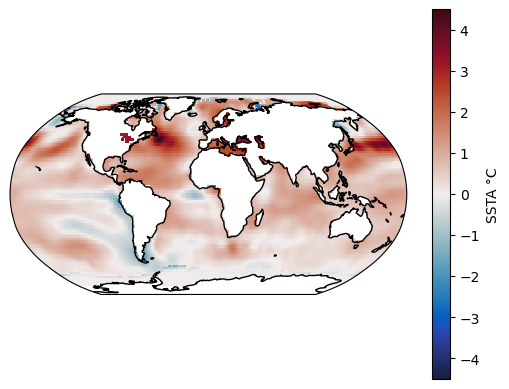

In [5]:
import cmocean

# creat 1945 better map
fig = plt.figure()
# set new projection
ax = plt.axes(projection = ccrs.Robinson())
p = plt.pcolormesh(lon, lat, ssta_1945, cmap = cmocean.cm.balance, transform = ccrs.PlateCarree(), 
              vmin = -4.5, vmax = 4.5)

# add features
ax.coastlines(resolution = '110m', color = 'black')
ax.add_feature(cfeature.LAND, color = 'white')

# add color bar
plt.colorbar(p, label = u'SSTA \N{DEGREE SIGN}C', shrink = 0.65)

# creat 2024 better map
fig = plt.figure()
# set new projection
ax = plt.axes(projection = ccrs.Robinson())
plt.pcolormesh(lon, lat, ssta_2024, cmap = cmocean.cm.balance, transform = ccrs.PlateCarree(), 
              vmin = -4.5, vmax = 4.5)

# add features
ax.coastlines(resolution = '110m', color = 'black')
ax.add_feature(cfeature.LAND, color = 'white')

# add color bar
plt.colorbar(label = u'SSTA \N{DEGREE SIGN}C')

## Let's focus on a specific place region in the North Atlantic
Here, we have 2 monitoring stations from OOI:
- [Global Irminger Sea Station](https://oceanobservatories.org/array/global-irminger-sea-array/)
- [Coastal Pioneer Station](https://oceanobservatories.org/array/coastal-pioneer-mid-atlantic-bight-array/)

## Let's look closer at the hot spot and make contours